In [ ]:
install.packages("tidyverse")
install.packages("corrplot")
install.packages("BAS")
library(tidyverse)
library(corrplot)
library(BAS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(foreign)

In [ ]:
#Load the dataset
data <- read.csv("/content/energy.csv")

In [ ]:
head(data)

,Relative.Compactness,Surface.Area,Wall.Area,Roof.Area,Overall.Height,Orientation,Glazing.Area,Glazing.Area.Distribution,Heating.Load
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>
1,0.98,514.5,294.0,110.25,7,2,0,0,15.55
2,0.98,514.5,294.0,110.25,7,3,0,0,15.55
3,0.98,514.5,294.0,110.25,7,4,0,0,15.55
4,0.98,514.5,294.0,110.25,7,5,0,0,15.55
5,0.90,563.5,318.5,122.50,7,2,0,0,20.84
6,0.90,563.5,318.5,122.50,7,3,0,0,21.46


In [ ]:
#Structure of the variables
str(data)

'data.frame':	768 obs. of  9 variables:
 $ Relative.Compactness     : num  0.98 0.98 0.98 0.98 0.9 0.9 0.9 0.9 0.86 0.86 ...
 $ Surface.Area             : num  514 514 514 514 564 ...
 $ Wall.Area                : num  294 294 294 294 318 ...
 $ Roof.Area                : num  110 110 110 110 122 ...
 $ Overall.Height           : num  7 7 7 7 7 7 7 7 7 7 ...
 $ Orientation              : int  2 3 4 5 2 3 4 5 2 3 ...
 $ Glazing.Area             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Glazing.Area.Distribution: int  0 0 0 0 0 0 0 0 0 0 ...
 $ Heating.Load             : num  15.6 15.6 15.6 15.6 20.8 ...


In [ ]:
#Remove the categorical variables and take all the numerical variables
energy<- data[, sapply(data, is.numeric)]
head(energy)

,Relative.Compactness,Surface.Area,Wall.Area,Roof.Area,Overall.Height,Orientation,Glazing.Area,Glazing.Area.Distribution,Heating.Load
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>
1,0.98,514.5,294.0,110.25,7,2,0,0,15.55
2,0.98,514.5,294.0,110.25,7,3,0,0,15.55
3,0.98,514.5,294.0,110.25,7,4,0,0,15.55
4,0.98,514.5,294.0,110.25,7,5,0,0,15.55
5,0.90,563.5,318.5,122.50,7,2,0,0,20.84
6,0.90,563.5,318.5,122.50,7,3,0,0,21.46


In [ ]:
# Check for missing values
colSums(is.na(energy))

Relative.Compactness              Surface.Area                 Wall.Area 
                        0                         0                         0 
                Roof.Area            Overall.Height               Orientation 
                        0                         0                         0 
             Glazing.Area Glazing.Area.Distribution              Heating.Load 
                        0                         0                         0

In [ ]:
summary(energy)

 Relative.Compactness  Surface.Area     Wall.Area       Roof.Area    
 Min.   :0.6200       Min.   :514.5   Min.   :245.0   Min.   :110.2  
 1st Qu.:0.6825       1st Qu.:606.4   1st Qu.:294.0   1st Qu.:140.9  
 Median :0.7500       Median :673.8   Median :318.5   Median :183.8  
 Mean   :0.7642       Mean   :671.7   Mean   :318.5   Mean   :176.6  
 3rd Qu.:0.8300       3rd Qu.:741.1   3rd Qu.:343.0   3rd Qu.:220.5  
 Max.   :0.9800       Max.   :808.5   Max.   :416.5   Max.   :220.5  
 Overall.Height  Orientation    Glazing.Area    Glazing.Area.Distribution
 Min.   :3.50   Min.   :2.00   Min.   :0.0000   Min.   :0.000            
 1st Qu.:3.50   1st Qu.:2.75   1st Qu.:0.1000   1st Qu.:1.750            
 Median :5.25   Median :3.50   Median :0.2500   Median :3.000            
 Mean   :5.25   Mean   :3.50   Mean   :0.2344   Mean   :2.812            
 3rd Qu.:7.00   3rd Qu.:4.25   3rd Qu.:0.4000   3rd Qu.:4.000            
 Max.   :7.00   Max.   :5.00   Max.   :0.4000   Max.   :5.000     

In [ ]:
names(energy) <- c("RelativeCompactness", "SurfaceArea", "WallArea", "RoofArea", "OverallHeight", "Orientation", "GlazingArea", "GlazingAreaDistribution", "HeatingLoad")

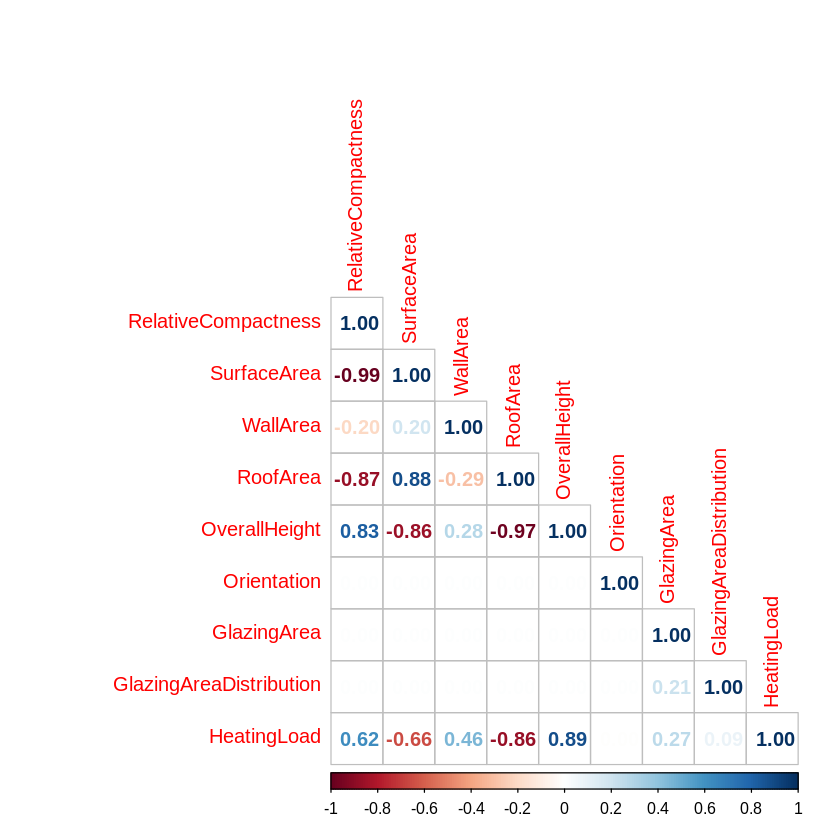

In [ ]:
corrplot(cor(energy), method="number", type="lower")

In [ ]:
install.packages("car")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(car)


In [ ]:
#check for multicollinearity
model_lm <- lm(HeatingLoad ~ RelativeCompactness + SurfaceArea + WallArea + OverallHeight + Orientation + GlazingArea + GlazingAreaDistribution, data = energy)
vif(model_lm)

RelativeCompactness             SurfaceArea                WallArea 
             105.524054              201.531134                7.492984 
          OverallHeight             Orientation             GlazingArea 
              31.205474                1.000000                1.047508 
GlazingAreaDistribution 
               1.047508

In [ ]:
energy <- subset(energy, select = -SurfaceArea)

In [ ]:
colnames(energy)

[1] "RelativeCompactness"     "WallArea"               
[3] "RoofArea"                "OverallHeight"          
[5] "Orientation"             "GlazingArea"            
[7] "GlazingAreaDistribution" "HeatingLoad"

In [ ]:
model_lm <- lm(HeatingLoad ~ RelativeCompactness + WallArea + OverallHeight + Orientation + GlazingArea + GlazingAreaDistribution, data = energy)
vif(model_lm)

RelativeCompactness                WallArea           OverallHeight 
               9.250283                3.161934                9.626103 
            Orientation             GlazingArea GlazingAreaDistribution 
               1.000000                1.047508                1.047508

In [ ]:
cor(energy)

,RelativeCompactness,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad
RelativeCompactness,1.000000e+00,-0.2037817,-8.688234e-01,0.8277473,0.000000000,7.617400e-20,0.00000000,0.622272179
WallArea,-2.037817e-01,1.0000000,-2.923165e-01,0.2809757,0.000000000,0.000000e+00,0.00000000,0.455671157
RoofArea,-8.688234e-01,-0.2923165,1.000000e+00,-0.9725122,0.000000000,-1.197187e-19,0.00000000,-0.861828253
OverallHeight,8.277473e-01,0.2809757,-9.725122e-01,1.0000000,0.000000000,0.000000e+00,0.00000000,0.889430674
Orientation,0.000000e+00,0.0000000,0.000000e+00,0.0000000,1.000000000,0.000000e+00,0.00000000,-0.002586534
GlazingArea,7.617400e-20,0.0000000,-1.197187e-19,0.0000000,0.000000000,1.000000e+00,0.21296422,0.269840996
GlazingAreaDistribution,0.000000e+00,0.0000000,0.000000e+00,0.0000000,0.000000000,2.129642e-01,1.00000000,0.087367594
HeatingLoad,6.222722e-01,0.4556712,-8.618283e-01,0.8894307,-0.002586534,2.698410e-01,0.08736759,1.000000000


In [ ]:
head(energy)

,RelativeCompactness,WallArea,RoofArea,OverallHeight,Orientation,GlazingArea,GlazingAreaDistribution,HeatingLoad
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>
1,0.98,294.0,110.25,7,2,0,0,15.55
2,0.98,294.0,110.25,7,3,0,0,15.55
3,0.98,294.0,110.25,7,4,0,0,15.55
4,0.98,294.0,110.25,7,5,0,0,15.55
5,0.90,318.5,122.50,7,2,0,0,20.84
6,0.90,318.5,122.50,7,3,0,0,21.46


In [ ]:
library (ggplot2)

`geom_smooth()` using formula = 'y ~ x'


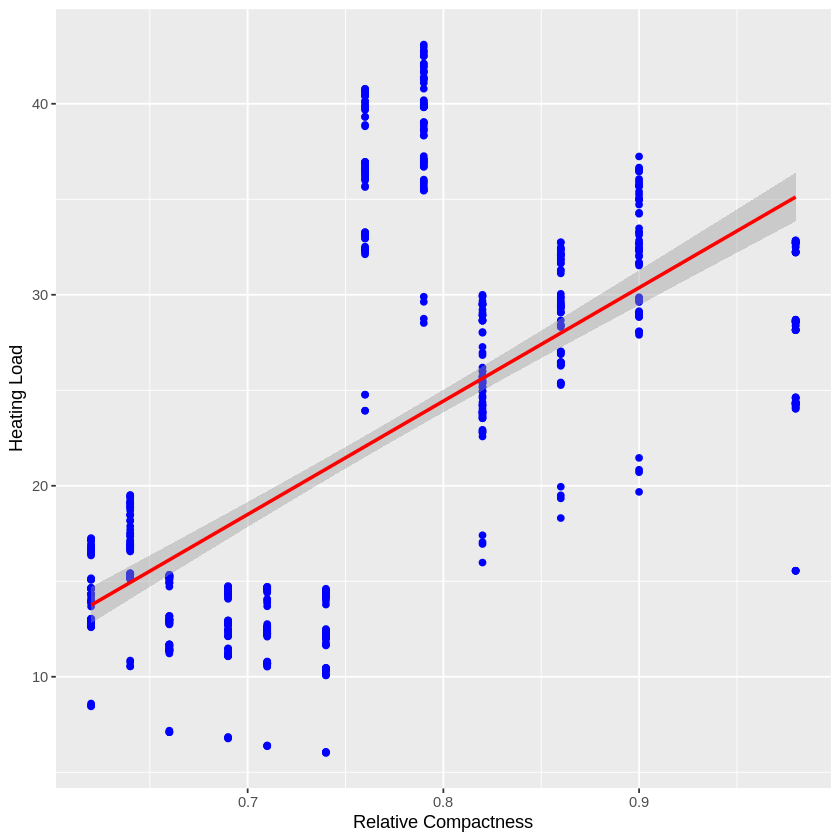

In [ ]:
scPlot1 <- ggplot(data = energy , mapping = aes(x = RelativeCompactness , y = HeatingLoad)) + geom_point(color="blue") + xlab("Relative Compactness") + ylab("Heating Load") + geom_smooth(method=lm, color="red")
scPlot1

`geom_smooth()` using formula = 'y ~ x'


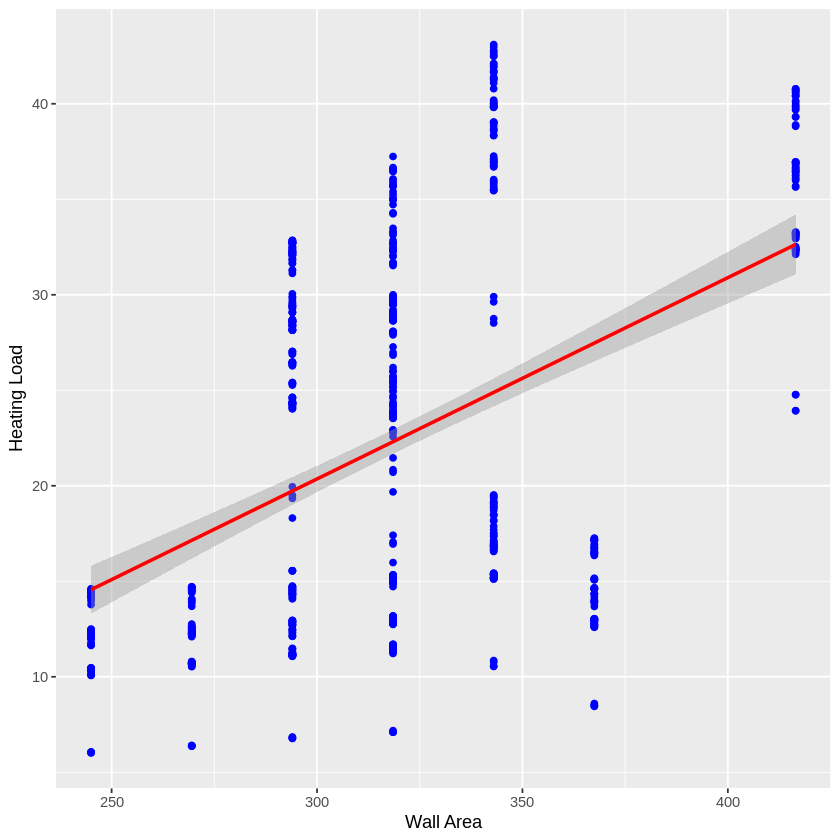

In [ ]:
scPlot2 <- ggplot(data = energy , mapping = aes(x =WallArea  , y =HeatingLoad)) + geom_point(color="blue") + xlab("Wall Area") + ylab("Heating Load") + geom_smooth(method=lm, color="red")
scPlot2


`geom_smooth()` using formula = 'y ~ x'


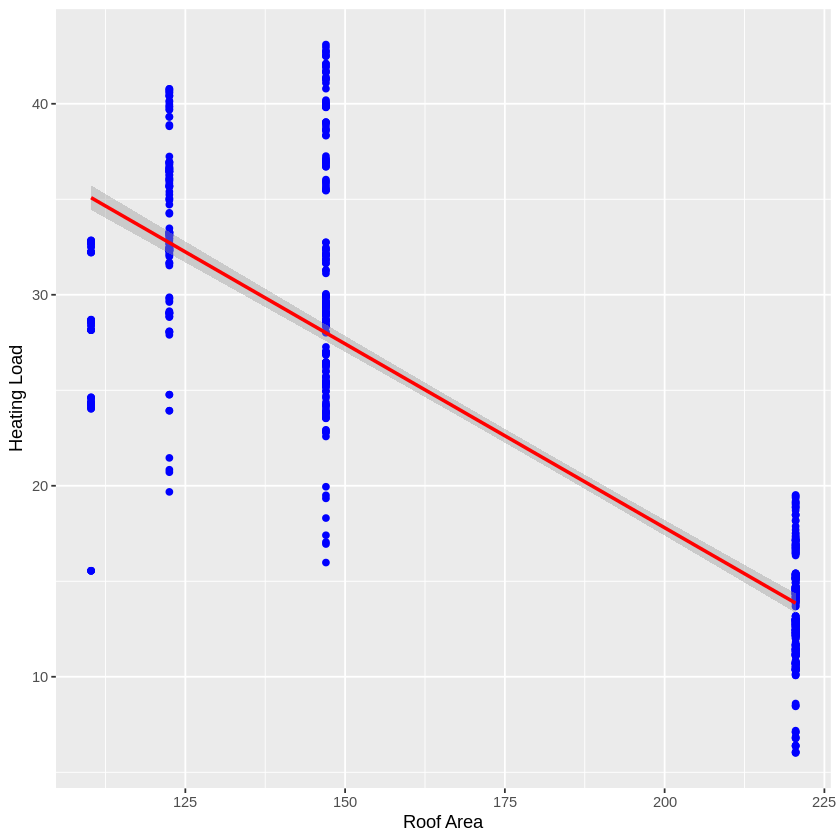

In [ ]:
scPlot3 <- ggplot(data = energy , mapping = aes(x =RoofArea   , y =HeatingLoad)) + geom_point(color="blue") + xlab(" Roof Area ") + ylab("Heating Load") + geom_smooth(method=lm, color="red")
scPlot3

`geom_smooth()` using formula = 'y ~ x'


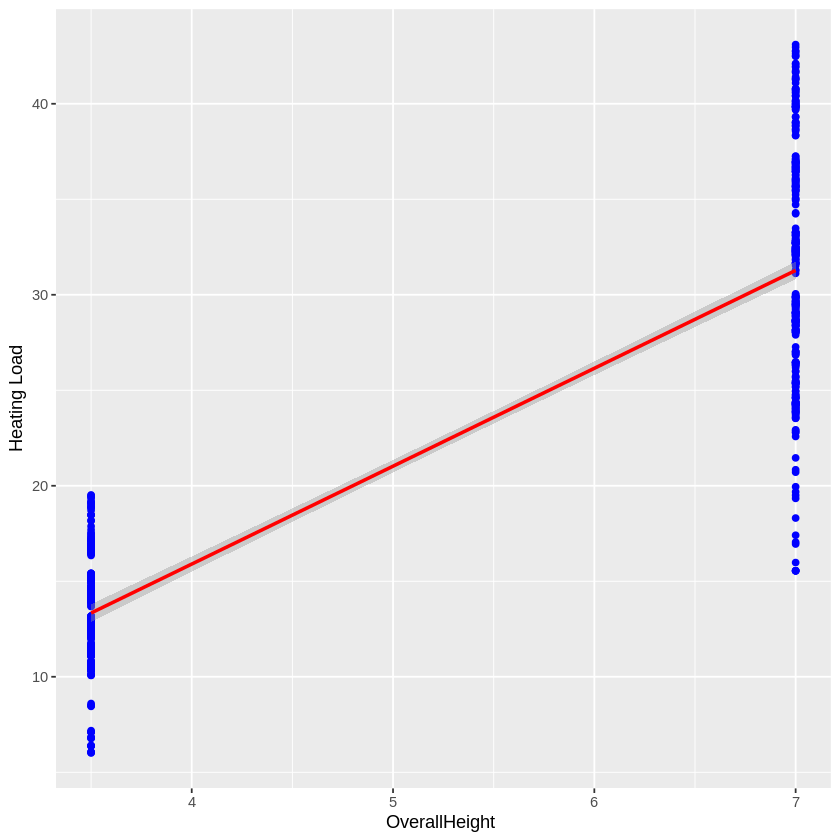

In [ ]:
scPlot4 <- ggplot(data = energy , mapping = aes(x =OverallHeight   , y =HeatingLoad)) + geom_point(color="blue") + xlab(" OverallHeight  ") + ylab("Heating Load") + geom_smooth(method=lm, color="red")
scPlot4

`geom_smooth()` using formula = 'y ~ x'


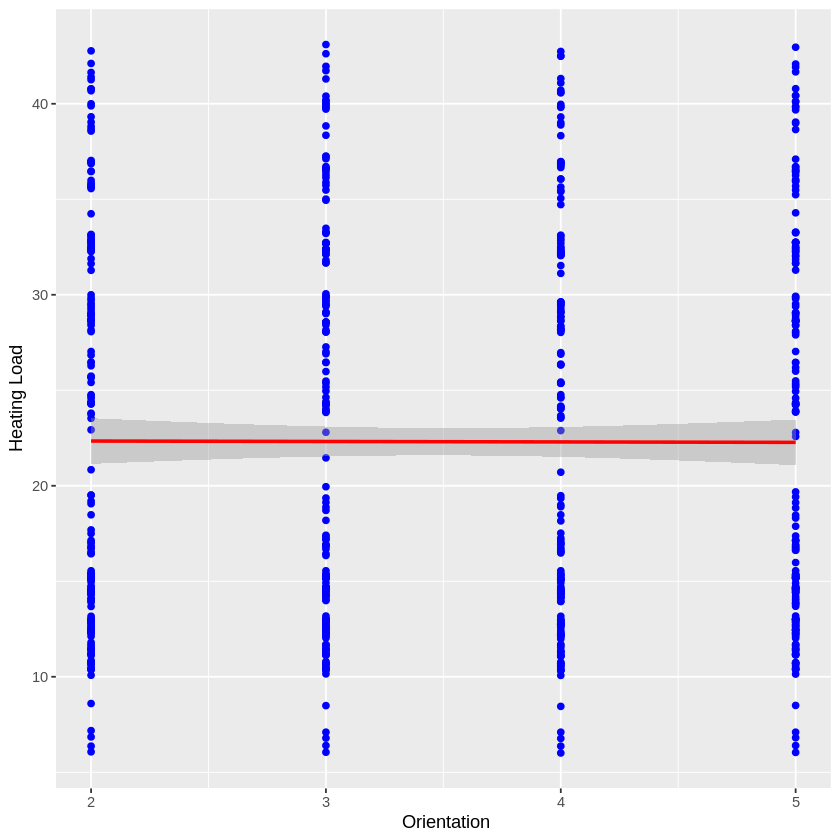

In [ ]:
scPlot5 <- ggplot(data = energy , mapping = aes(x =Orientation   , y =HeatingLoad)) + geom_point(color="blue") + xlab(" Orientation") + ylab("Heating Load") + geom_smooth(method=lm, color="red")
scPlot5

`geom_smooth()` using formula = 'y ~ x'


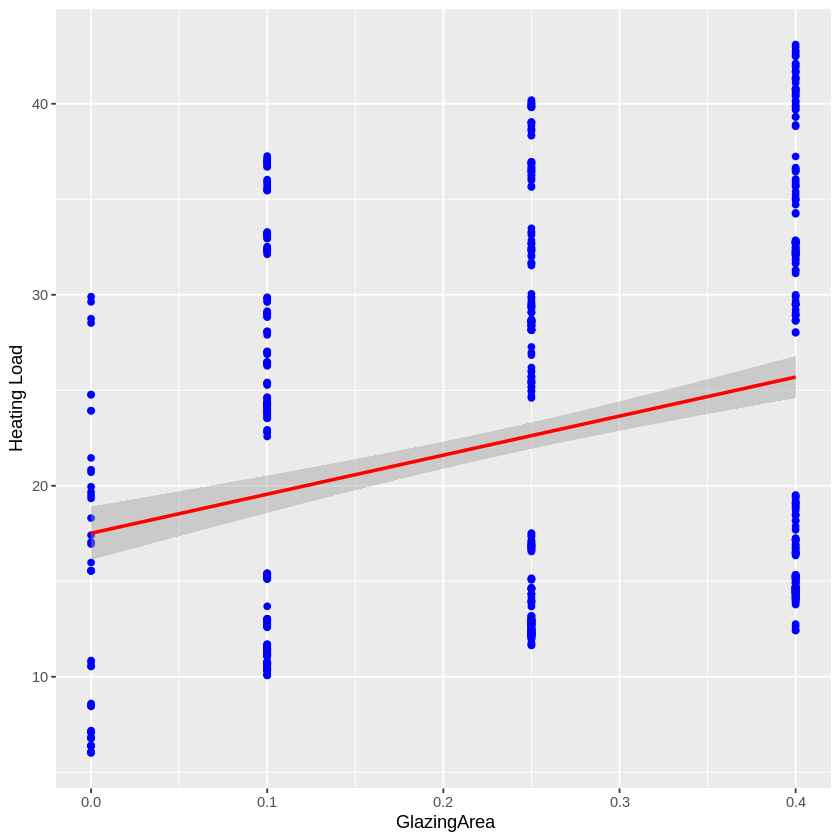

In [ ]:
scPlot6 <- ggplot(data = energy , mapping = aes(x =GlazingArea   , y =HeatingLoad)) + geom_point(color="blue") + xlab(" GlazingArea") + ylab("Heating Load") + geom_smooth(method=lm, color="red")
scPlot6

`geom_smooth()` using formula = 'y ~ x'


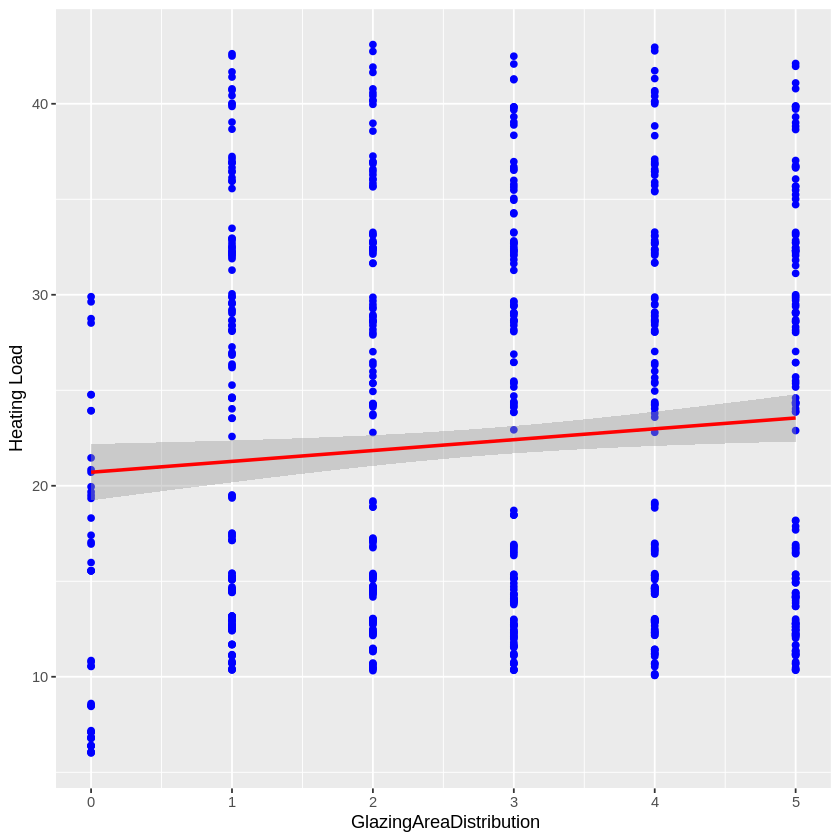

In [ ]:
scPlot7 <- ggplot(data = energy , mapping = aes(x =GlazingAreaDistribution   , y =HeatingLoad)) + geom_point(color="blue") + xlab(" GlazingAreaDistribution") + ylab("Heating Load") + geom_smooth(method=lm, color="red")
scPlot7

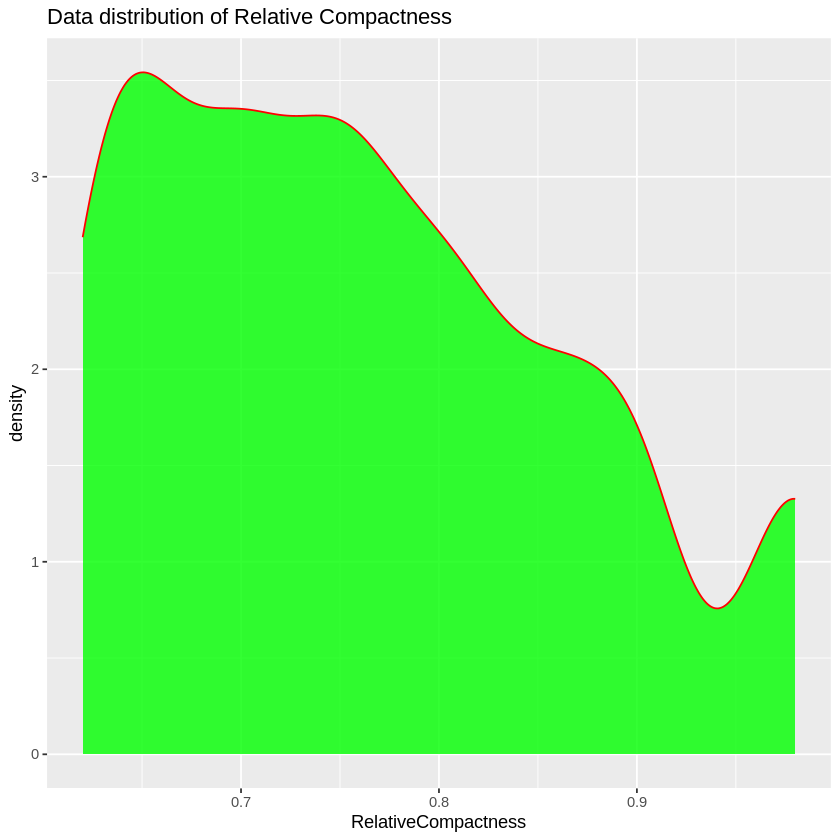

In [ ]:
energy %>%
  ggplot(aes(x= RelativeCompactness)) +
  geom_density(fill="green", color = "red", alpha=0.8)+
  ggtitle("Data distribution of Relative Compactness")

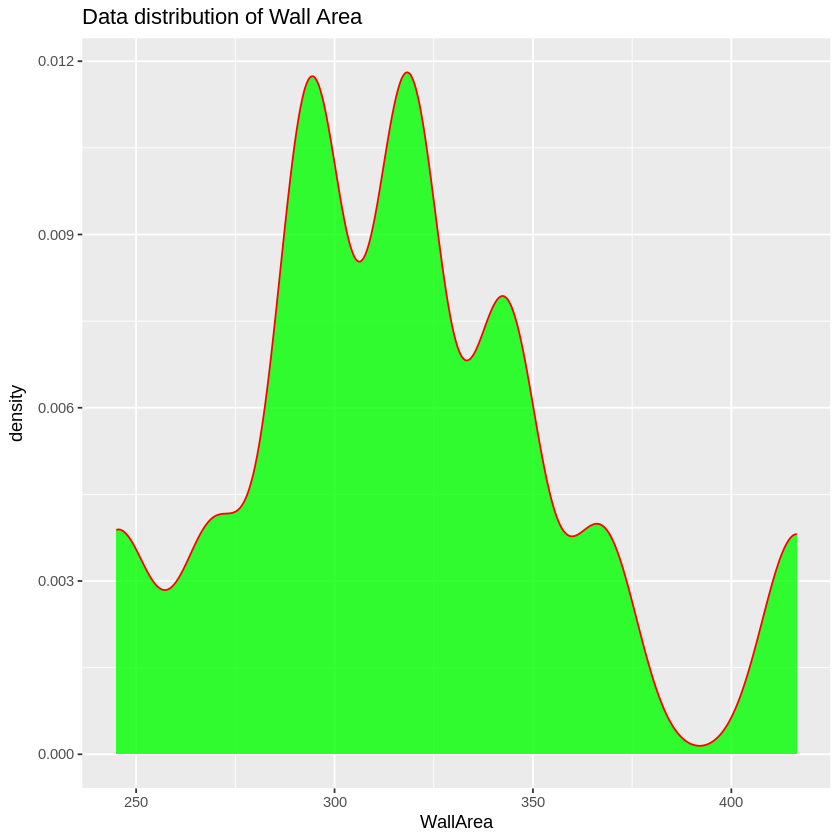

In [ ]:
energy %>%
  ggplot(aes(x= WallArea)) +
  geom_density(fill="green", color = "red", alpha=0.8)+
  ggtitle("Data distribution of Wall Area")

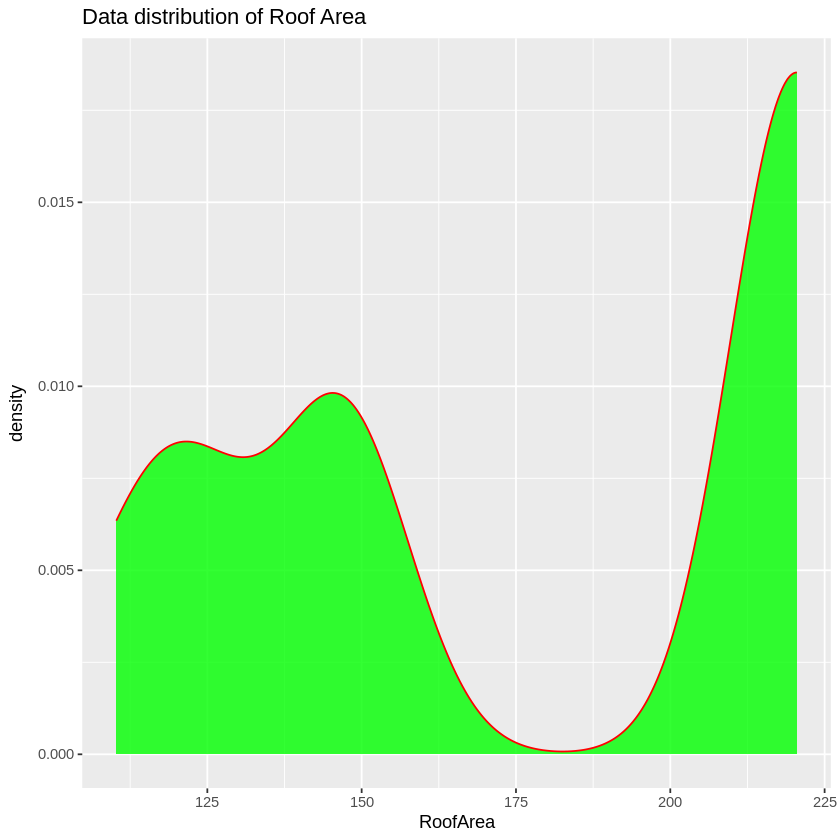

In [ ]:
energy %>%
  ggplot(aes(x= RoofArea)) +
  geom_density(fill="green", color = "red", alpha=0.8)+
  ggtitle("Data distribution of Roof Area")

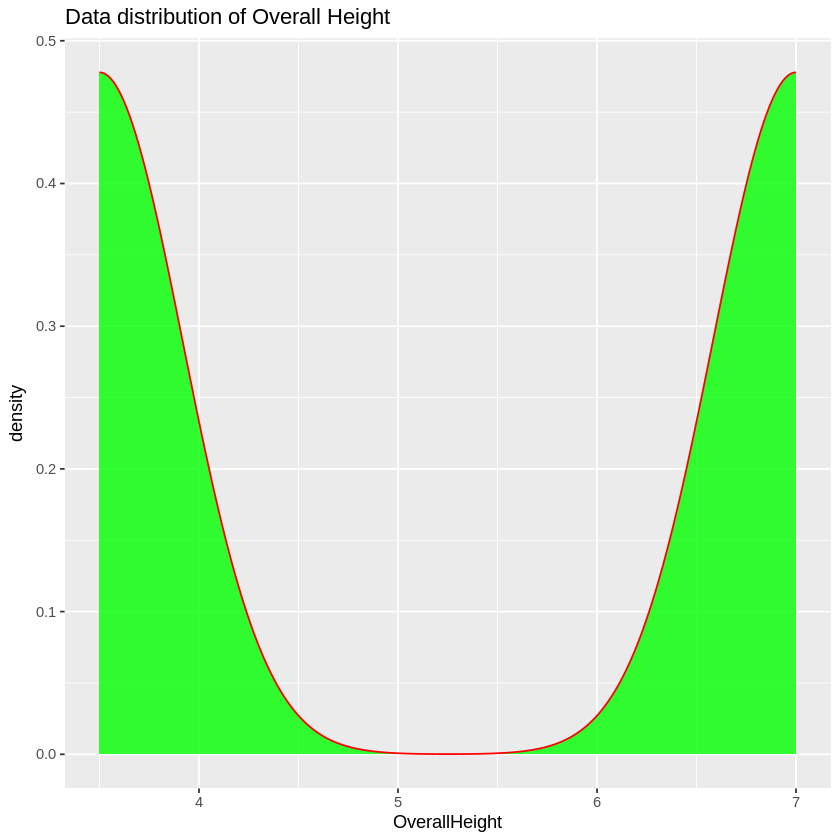

In [ ]:
energy %>%
  ggplot(aes(x= OverallHeight)) +
  geom_density(fill="green", color = "red", alpha=0.8)+
  ggtitle("Data distribution of Overall Height")

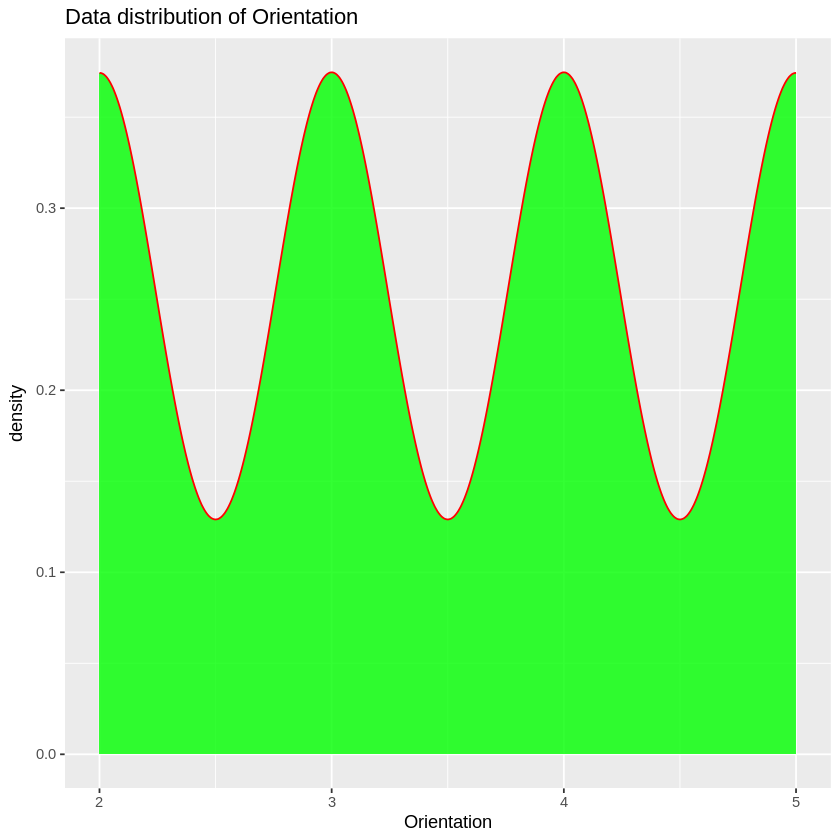

In [ ]:
energy %>%
  ggplot(aes(x= Orientation)) +
  geom_density(fill="green", color = "red", alpha=0.8)+
  ggtitle("Data distribution of Orientation")

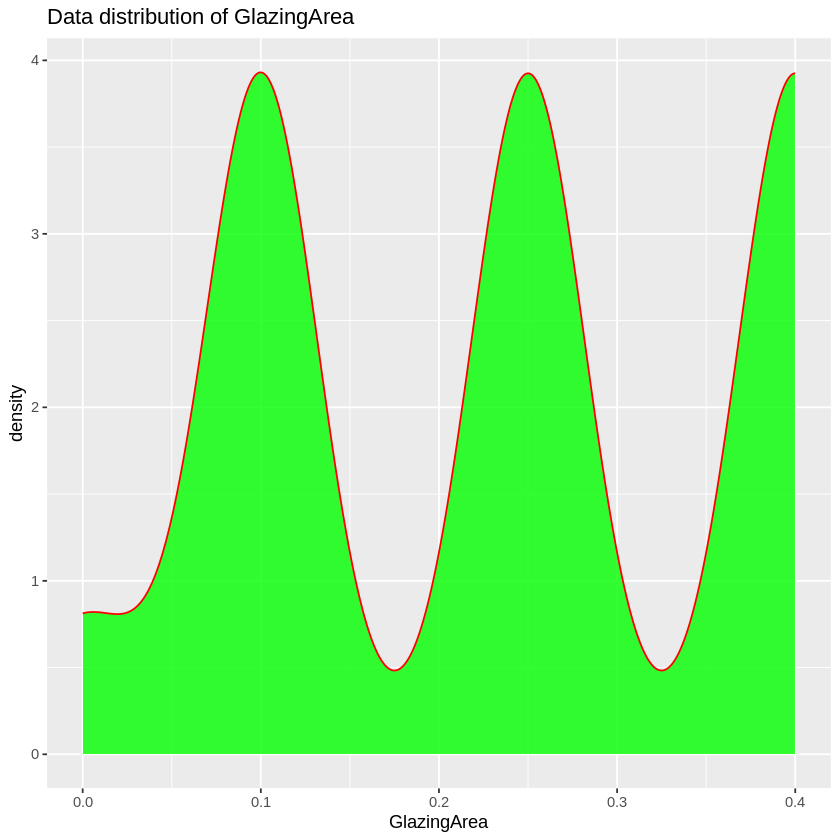

In [ ]:
energy %>%
  ggplot(aes(x=GlazingArea )) +
  geom_density(fill="green", color = "red", alpha=0.8)+
  ggtitle("Data distribution of GlazingArea")

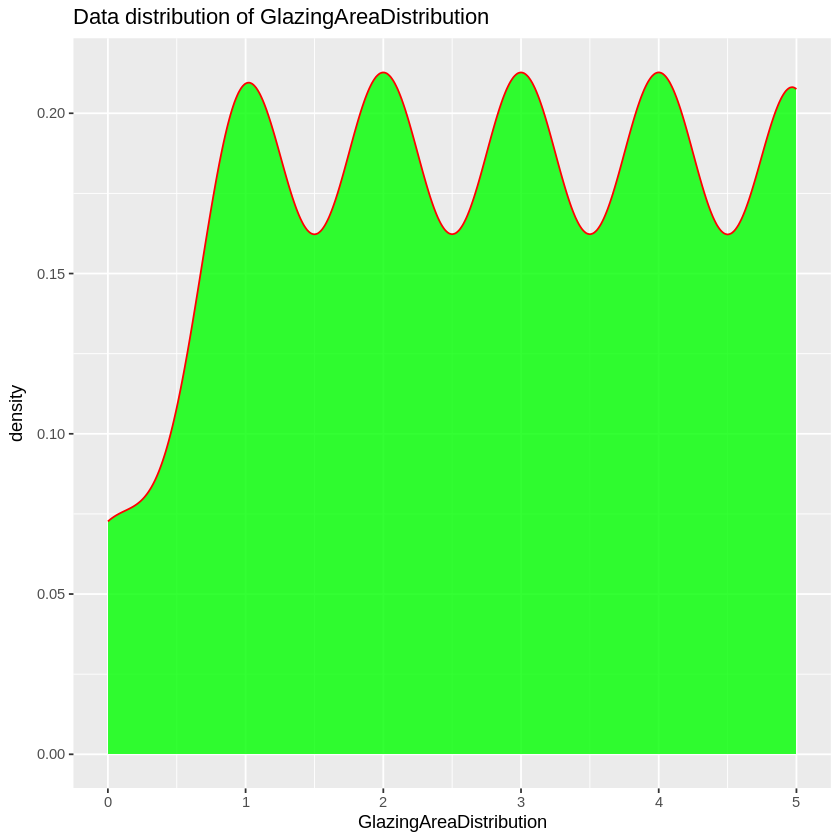

In [ ]:
energy %>%
  ggplot(aes(x= GlazingAreaDistribution)) +
  geom_density(fill="green", color = "red", alpha=0.8)+
  ggtitle("Data distribution of GlazingAreaDistribution")

In [ ]:
.#Perform BIC elimination from the ful model
df.lm = lm(HeatingLoad~., data=energy)
n = nrow(energy)
df.step = step(df.lm, k = log(n))

Start:  AIC=1698.57
HeatingLoad ~ RelativeCompactness + WallArea + RoofArea + OverallHeight + 
    Orientation + GlazingArea + GlazingAreaDistribution

                          Df Sum of Sq     RSS    AIC
- Orientation              1       0.5  6544.3 1692.0
- WallArea                 1      37.0  6580.8 1696.3
<none>                                  6543.8 1698.6
- GlazingAreaDistribution  1      73.1  6616.9 1700.5
- RoofArea                 1     225.0  6768.8 1717.9
- RelativeCompactness      1     341.2  6885.0 1731.0
- OverallHeight            1    1310.6  7854.4 1832.1
- GlazingArea              1    5163.1 11706.9 2138.7

Step:  AIC=1691.99
HeatingLoad ~ RelativeCompactness + WallArea + RoofArea + OverallHeight + 
    GlazingArea + GlazingAreaDistribution

                          Df Sum of Sq     RSS    AIC
- WallArea                 1      37.0  6581.3 1689.7
<none>                                  6544.3 1692.0
- GlazingAreaDistribution  1      73.1  6617.4 1693.9
- RoofAr

In [ ]:
#Perform BIC elimination from the ful model
df.step = step(df.lm, k = log(n))

Start:  AIC=1698.57
HeatingLoad ~ RelativeCompactness + WallArea + RoofArea + OverallHeight + 
    Orientation + GlazingArea + GlazingAreaDistribution

                          Df Sum of Sq     RSS    AIC
- Orientation              1       0.5  6544.3 1692.0
- WallArea                 1      37.0  6580.8 1696.3
<none>                                  6543.8 1698.6
- GlazingAreaDistribution  1      73.1  6616.9 1700.5
- RoofArea                 1     225.0  6768.8 1717.9
- RelativeCompactness      1     341.2  6885.0 1731.0
- OverallHeight            1    1310.6  7854.4 1832.1
- GlazingArea              1    5163.1 11706.9 2138.7

Step:  AIC=1691.99
HeatingLoad ~ RelativeCompactness + WallArea + RoofArea + OverallHeight + 
    GlazingArea + GlazingAreaDistribution

                          Df Sum of Sq     RSS    AIC
- WallArea                 1      37.0  6581.3 1689.7
<none>                                  6544.3 1692.0
- GlazingAreaDistribution  1      73.1  6617.4 1693.9
- RoofAr

In [ ]:
# Full model using all predictors
df.lm_full = lm(HeatingLoad ~ . , data = energy)
summary(df.lm_full)


Call:
lm(formula = HeatingLoad ~ ., data = energy)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8965 -1.3196 -0.0252  1.3532  7.7052 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              84.01452   19.03361   4.414 1.16e-05 ***
RelativeCompactness     -64.77399   10.28944  -6.295 5.19e-10 ***
WallArea                 -0.02648    0.01277  -2.073  0.03853 *  
RoofArea                 -0.17458    0.03415  -5.112 4.04e-07 ***
OverallHeight             4.16994    0.33799  12.337  < 2e-16 ***
Orientation              -0.02333    0.09470  -0.246  0.80550    
GlazingArea              19.93268    0.81399  24.488  < 2e-16 ***
GlazingAreaDistribution   0.20377    0.06992   2.914  0.00367 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.934 on 760 degrees of freedom
Multiple R-squared:  0.9162,	Adjusted R-squared:  0.9154 
F-statistic:  1187 on 7 and 760 DF,  p-value: < 2.2e-16


In [ ]:
#Perform BIC elimination from the ful model
df.step2 = step(df.lm_full, k = log(n))

Start:  AIC=1698.57
HeatingLoad ~ RelativeCompactness + WallArea + RoofArea + OverallHeight + 
    Orientation + GlazingArea + GlazingAreaDistribution

                          Df Sum of Sq     RSS    AIC
- Orientation              1       0.5  6544.3 1692.0
- WallArea                 1      37.0  6580.8 1696.3
<none>                                  6543.8 1698.6
- GlazingAreaDistribution  1      73.1  6616.9 1700.5
- RoofArea                 1     225.0  6768.8 1717.9
- RelativeCompactness      1     341.2  6885.0 1731.0
- OverallHeight            1    1310.6  7854.4 1832.1
- GlazingArea              1    5163.1 11706.9 2138.7

Step:  AIC=1691.99
HeatingLoad ~ RelativeCompactness + WallArea + RoofArea + OverallHeight + 
    GlazingArea + GlazingAreaDistribution

                          Df Sum of Sq     RSS    AIC
- WallArea                 1      37.0  6581.3 1689.7
<none>                                  6544.3 1692.0
- GlazingAreaDistribution  1      73.1  6617.4 1693.9
- RoofAr

In [ ]:
library(BAS)

In [ ]:
cog.bas = bas.lm(HeatingLoad~ . , data = energy,
                 prior = "BIC",
                 modelprior = uniform(),
                 include.always = ~ .)
cog.bas


Call:
bas.lm(formula = HeatingLoad ~ ., data = energy, prior = "BIC", 
    modelprior = uniform(), include.always = ~.)


 Marginal Posterior Inclusion Probabilities: 
              Intercept      RelativeCompactness                 WallArea  
                      1                        1                        1  
               RoofArea            OverallHeight              Orientation  
                      1                        1                        1  
            GlazingArea  GlazingAreaDistribution  
                      1                        1  

In [ ]:
summary(cog.bas)

,P(B != 0 | Y),model 1
Intercept,1,1.0000
RelativeCompactness,1,1.0000
WallArea,1,1.0000
RoofArea,1,1.0000
OverallHeight,1,1.0000
Orientation,1,1.0000
GlazingArea,1,1.0000
GlazingAreaDistribution,1,1.0000
BF,NA,1.0000
PostProbs,NA,1.0000


In [ ]:
# Find the best model based on maximum log marginal likelihood
best = which.max(cog.bas$logmarg)

# Get the variables included in the best model
bestmodel = cog.bas$which[[best]]
bestmodel

# Display the variables in the best model
bestgamma = rep(0, cog.bas$n.vars)
bestgamma[bestmodel + 1] = 1
bestgamma

[1] 0 1 2 3 4 5 6 7

[1] 1 1 1 1 1 1 1 1

In [ ]:
cog.coef = coef(cog.bas)
cog.coef


 Marginal Posterior Summaries of Coefficients: 

 Using  BMA 

 Based on the top  1 models 
                         post mean  post SD    post p(B != 0)
Intercept                 22.30720    0.10588    1.00000     
RelativeCompactness      -64.77399   10.28944    1.00000     
WallArea                  -0.02648    0.01277    1.00000     
RoofArea                  -0.17458    0.03415    1.00000     
OverallHeight              4.16994    0.33799    1.00000     
Orientation               -0.02333    0.09470    1.00000     
GlazingArea               19.93268    0.81399    1.00000     
GlazingAreaDistribution    0.20377    0.06992    1.00000     

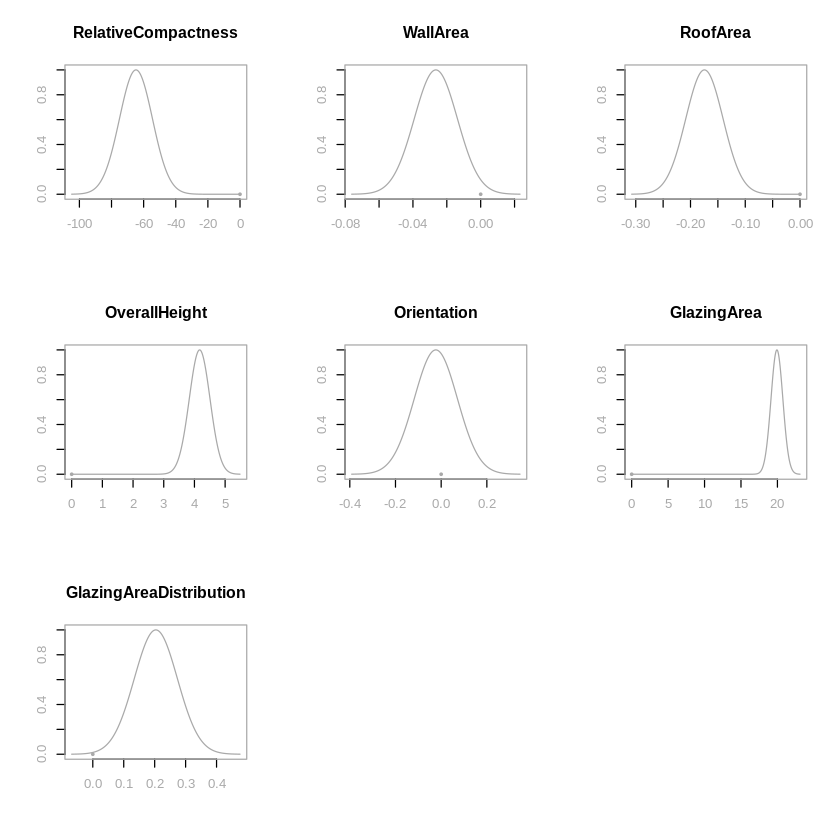

In [ ]:
#Coefficient summary
par(mfrow = c(3, 3), col.lab = "darkgrey", col.axis = "darkgrey", col = "darkgrey")
plot(cog.coef, subset = 2:8, ask = F)

In [ ]:
#Credible interval summary
confint(cog.coef, parm = 2:8)

                                2.5%         97.5%         beta
RelativeCompactness     -84.97310070 -44.574882281 -64.77399149
WallArea                 -0.05155229  -0.001401579  -0.02647693
RoofArea                 -0.24162198  -0.107539115  -0.17458055
OverallHeight             3.50643397   4.833443661   4.16993881
Orientation              -0.20924198   0.162585727  -0.02332813
GlazingArea              18.33475226  21.530608099  19.93268018
GlazingAreaDistribution   0.06651684   0.341026700   0.20377177
attr(,"Probability")
[1] 0.95
attr(,"class")
[1] "confint.bas"

In [ ]:
out = confint(cog.coef)[, 1:2]
# Extract the upper and lower bounds of the credible intervals
names = c("posterior mean", "posterior std", colnames(out))
out = cbind(cog.coef$postmean, cog.coef$postsd, out)
colnames(out) = names
round(out, 2)

,posterior mean,posterior std,2.5%,97.5%
Intercept,22.31,0.11,22.10,22.52
RelativeCompactness,-64.77,10.29,-84.97,-44.57
WallArea,-0.03,0.01,-0.05,0.00
RoofArea,-0.17,0.03,-0.24,-0.11
OverallHeight,4.17,0.34,3.51,4.83
Orientation,-0.02,0.09,-0.21,0.16
GlazingArea,19.93,0.81,18.33,21.53
GlazingAreaDistribution,0.20,0.07,0.07,0.34


In [ ]:
# Fit the best BIC model by imposing which variables to be used using the indicators
cog.bestBIC = bas.lm(HeatingLoad ~ ., data = energy, prior = "BIC", n.models = 1, # We only fit 1 model
bestmodel = bestgamma, # We use bestgamma to indicate variables
modelprior = uniform())
cog.bestBIC


Call:
bas.lm(formula = HeatingLoad ~ ., data = energy, n.models = 1, 
    prior = "BIC", modelprior = uniform(), bestmodel = bestgamma)


 Marginal Posterior Inclusion Probabilities: 
              Intercept      RelativeCompactness                 WallArea  
                      1                        1                        1  
               RoofArea            OverallHeight              Orientation  
                      1                        1                        1  
            GlazingArea  GlazingAreaDistribution  
                      1                        1  

In [ ]:
# Retrieve coefficients information
df.coef = coef(cog.bestBIC)

# Retrieve bounds of credible intervals
out = confint(df.coef)[, 1:2]

# Combine results and construct summary table
coef.BIC = cbind(df.coef$postmean, df.coef$postsd, out)
names = c("post mean", "post sd", colnames(out))
colnames(coef.BIC) = names
coef.BIC

,post mean,post sd,2.5%,97.5%
Intercept,22.30720052,0.10588306,22.09934252,22.515058526
RelativeCompactness,-64.77399149,10.28944483,-84.97310070,-44.574882281
WallArea,-0.02647693,0.01277341,-0.05155229,-0.001401579
RoofArea,-0.17458055,0.03415097,-0.24162198,-0.107539115
OverallHeight,4.16993881,0.33798998,3.50643397,4.833443661
Orientation,-0.02332813,0.09470469,-0.20924198,0.162585727
GlazingArea,19.93268018,0.81398595,18.33475226,21.530608099
GlazingAreaDistribution,0.20377177,0.06991779,0.06651684,0.341026700


In [ ]:
# Get the names of the variables in the best model (excluding intercept)
best_model_vars <- names(energy)[bestgamma == 1][-1] # Exclude the intercept which is always included

# Construct the formula for the best model
best_model_formula <- as.formula(paste("HeatingLoad ~", paste(best_model_vars, collapse = " + ")))

# Fit the best model using bas.lm
model1 = bas.lm(best_model_formula, data = energy, prior = "BIC", modelprior = uniform())
model1

Warning message in model.matrix.default(mt, mf, contrasts):
“the response appeared on the right-hand side and was dropped”
Warning message in model.matrix.default(mt, mf, contrasts):
“problem with term 7 in model.matrix: no columns are assigned”



Call:
bas.lm(formula = best_model_formula, data = energy, prior = "BIC", 
    modelprior = uniform())


 Marginal Posterior Inclusion Probabilities: 
              Intercept                 WallArea                 RoofArea  
                1.00000                  1.00000                  0.74714  
          OverallHeight              Orientation              GlazingArea  
                1.00000                  0.03581                  1.00000  
GlazingAreaDistribution  
                0.67339  

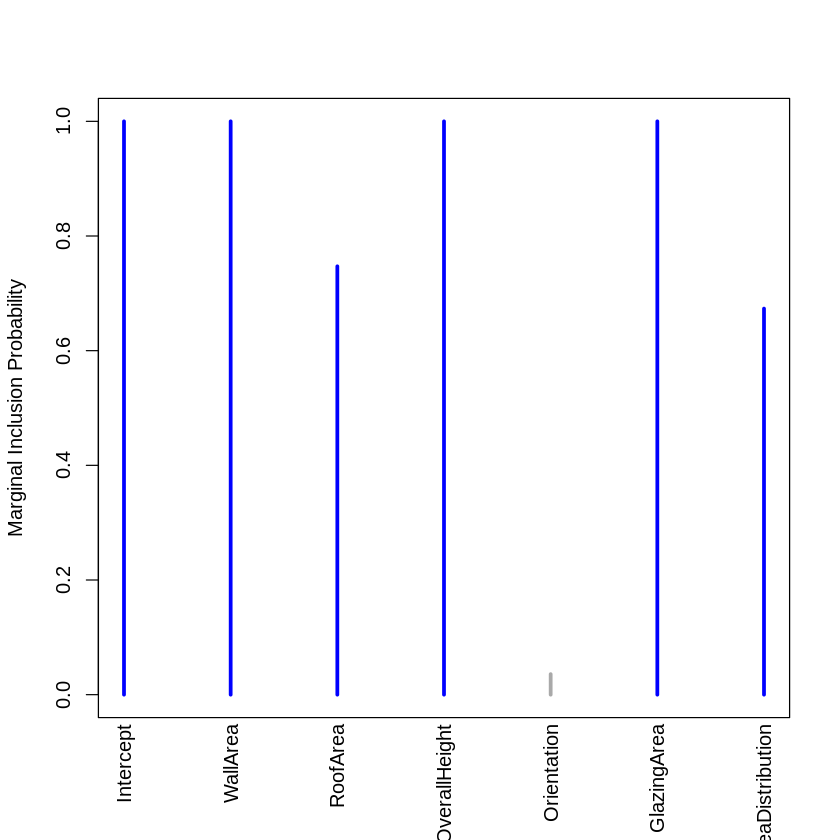

In [ ]:
#best fitted model
plot(model1, which = 4, ask = F, caption = "", sub.caption = "", col.in = "blue", col.ex = "darkgrey", lwd = 3)